#### MAESTRÍA EN ECONOMÍA APLICADA - UBA 2025
#### TALLER DE PROGRAMACIÓN
#### GRUPO 2 - TP1

In [1]:
# Librerías a utilizar
# !pip install openpyxl - utilizar en caso no te cargue el archivo de excel
import pandas as pd
import numpy as np
import seaborn as sns   
import matplotlib.pyplot as plt

In [2]:
# Carga de datos de individuos de la EPH 1T2005-1T2025
#T105_original = pd.read_stata("C:\\Users\\user\\Documents\\GitHub\\Big-Data-UBA--Grupo-2\\base de datos\\usu_individual_T105.dta",convert_categoricals=False)
#T125_original = pd.read_excel("C:\\Users\\user\\Documents\\GitHub\\Big-Data-UBA--Grupo-2\\base de datos\\usu_individual_T125.xlsx")
T105_original = pd.read_stata("C:\\Users\\marti\\OneDrive\\Documentos\\GitHub\\Big-Data-UBA--Grupo-2\\base de datos\\usu_individual_T105.dta",convert_categoricals=False)
T125_original = pd.read_excel("C:\\Users\\marti\\OneDrive\\Documentos\\GitHub\\Big-Data-UBA--Grupo-2\\base de datos\\usu_individual_T125.xlsx")

In [3]:
# Carga de datos de hogares de la EPH 1T2005-1T2025 (para parte 1.d, que es opcional)
# H105_original = pd.read_stata("C:\\Users\\user\\Documents\\GitHub\\Big-Data-UBA--Grupo-2\\base de datos\\Hogar_T105.dta",convert_categoricals=False)
# H125_original = pd.read_excel("C:\\Users\\user\\Documents\\GitHub\\Big-Data-UBA--Grupo-2\\base de datos\\usu_hogar_T125.xlsx")
H105_original = pd.read_stata("C:\\Users\\marti\\OneDrive\\Documentos\\GitHub\\Big-Data-UBA--Grupo-2\\base de datos\\Hogar_T105.dta",convert_categoricals=False)
H125_original = pd.read_excel("C:\\Users\\marti\\OneDrive\\Documentos\\GitHub\\Big-Data-UBA--Grupo-2\\base de datos\\usu_hogar_T125.xlsx")

In [9]:
print("Columnas T105_original:", T105_original.columns.tolist())
print("Columnas T125_original:", T125_original.columns.tolist())


Columnas T105_original: ['CODUSU', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre', 'region', 'mas_500', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch15_cod', 'ch16', 'ch16_cod', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'pp02c1', 'pp02c2', 'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'pp02c8', 'pp02e', 'pp02h', 'pp02i', 'pp03c', 'pp03d', 'pp3e_tot', 'pp3f_tot', 'pp03g', 'pp03h', 'pp03i', 'pp03j', 'intensi', 'pp04a', 'pp04b_cod', 'pp04b1', 'pp04b2', 'pp04b3_mes', 'pp04b3_ano', 'pp04b3_dia', 'pp04c', 'pp04c99', 'pp04d_cod', 'pp04g', 'pp05b2_mes', 'pp05b2_ano', 'pp05b2_dia', 'pp05c_1', 'pp05c_2', 'pp05c_3', 'pp05e', 'pp05f', 'pp05h', 'pp06a', 'pp06c', 'pp06d', 'pp06e', 'pp06h', 'pp07a', 'pp07c', 'pp07d', 'pp07e', 'pp07f1', 'pp07f2', 'pp07f3', 'pp07f4', 'pp07f5', 'pp07g1', 'pp07g2', 'pp07g3', 'pp07g4', 'pp07g_59', 'pp07h', 'pp07i', 'pp07j', 'pp07k', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08f2', 'pp08j1

#### PARTE 1 - 2.a: Selección de región y fusión de bases

In [84]:
# Seleccion de variables de interes
select_var_T105 = ["CODUSU", "nro_hogar", "ch03", "ch04", "ch06", "ch07", "ch08", "nivel_ed", "estado", "cat_inac", "ipcf",
                   "cat_ocup", "pp03c", "pp03i", "pp10a", "p21", "tot_p12", "t_vi","itf","ch12", "ch13", "ch14", "pp3e_tot", "pp3f_tot"]
select_var_T125 = ["CODUSU", "NRO_HOGAR", "CH03", "CH04", "CH06", "CH07", "CH08", "NIVEL_ED", "ESTADO", "CAT_INAC", "IPCF",
                   "CAT_OCUP", "PP03C", "PP03I", "PP10A", "P21", "TOT_P12", "T_VI","ITF","CH12", "CH13", "CH14", "PP3E_TOT", "PP3F_TOT"]

# Actualizamos nuestro dataframe con las variables seleccionadas y la región seleccionada Noroeste = NOA = 40
T105 = T105_original[T105_original['region'] == 40][select_var_T105]
T125 = T125_original[T125_original['REGION'] == 40][select_var_T125]

# Homogeneizamos los nombres de las columnas para poder fusionarlas más adelante
column_mapping = dict(zip(select_var_T125, select_var_T105)) # diccionario
T125 = T125.rename(columns=column_mapping) # renombramos

In [85]:
# Antes de proceder con la unión de ambas bases, verificamos que ambas tengan el mismo tipo de dato.
T105.info()
T125.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9348 entries, 9484 to 18831
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CODUSU     9348 non-null   object 
 1   nro_hogar  9348 non-null   float64
 2   ch03       9348 non-null   float64
 3   ch04       9348 non-null   float64
 4   ch06       9348 non-null   float64
 5   ch07       9348 non-null   float64
 6   ch08       9348 non-null   float64
 7   nivel_ed   9348 non-null   float64
 8   estado     9348 non-null   float64
 9   cat_inac   9348 non-null   float64
 10  ipcf       9348 non-null   float64
 11  cat_ocup   9348 non-null   float64
 12  pp03c      9348 non-null   float64
 13  pp03i      9348 non-null   float64
 14  pp10a      9348 non-null   float64
 15  p21        9348 non-null   float64
 16  tot_p12    9348 non-null   float64
 17  t_vi       9348 non-null   float64
 18  itf        9348 non-null   float64
 19  ch12       9348 non-null   float64
 20  ch13     

#### PARTE 1 - 2.b: Revisión de formato

In [86]:
# Ajustamos el Dtype para ambas bases
categóricas = ["ch04","ch06","ch07","ch08","nivel_ed","estado","cat_inac", "cat_ocup", "pp03c","pp03i","pp10a"]
T105[categóricas] = T105[categóricas].astype('int64')
T125["ch08"] = T125["ch08"].astype('int64')

# Creamos columna para identificar los df
T105['df'] = 'T105'
T125['df'] = 'T125'

# Fusionamos los archivos
eph_105_125 = pd.concat([T105, T125], ignore_index=True)
eph_105_125.sample(6)


,CODUSU,nro_hogar,ch03,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,...,p21,tot_p12,t_vi,itf,ch12,ch13,ch14,pp3e_tot,pp3f_tot,df
18187,TQRMNOQRTHMOKOCDEHJGH00882399,1.0,3.0,2,30,5,4,3,1,0,...,300000.0,0.0,0.0,2500000.0,4.0,2.0,3.0,32.0,0.0,T125
7112,145171,1.0,3.0,1,5,5,4,7,4,5,...,0.0,0.0,0.0,300.0,0.0,0.0,,0.0,0.0,T105
1310,262637,1.0,3.0,1,33,5,1,2,1,0,...,800.0,0.0,0.0,7570.0,2.0,1.0,,66.0,0.0,T105
16873,TQRMNOPSYHKMLNCDEGPDJ00857604,1.0,1.0,1,46,1,4,4,1,0,...,340000.0,0.0,0.0,1300000.0,4.0,1.0,NaN,60.0,0.0,T125
828,202683,1.0,5.0,2,7,5,4,1,4,3,...,0.0,0.0,0.0,1075.0,3.0,2.0,02,0.0,0.0,T105
1753,148526,1.0,1.0,1,61,3,1,1,3,4,...,0.0,0.0,0.0,1000.0,2.0,2.0,02,0.0,0.0,T105


In [87]:
# Procedemos a revisar las variables que tenemos, exceptuando las variables de identificación
eph_105_125.drop("nro_hogar", axis=1).describe()

,ch03,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf,cat_ocup,...,pp03i,pp10a,p21,tot_p12,t_vi,itf,ch12,ch13,pp3e_tot,pp3f_tot
count,19090.000000,19090.000000,19090.000000,19090.000000,19090.000000,19090.000000,19090.000000,19090.000000,1.909000e+04,19090.000000,...,13701.000000,9571.000000,1.909000e+04,1.909000e+04,1.909000e+04,1.909000e+04,19090.000000,19090.000000,13701.000000,13701.000000
mean,2.727763,1.518491,32.657098,3.728392,2.731011,3.632635,2.301100,1.895862,1.878937e+05,1.190257,...,1.029487,0.207606,1.183426e+05,9.127822e+03,5.466182e+04,6.709034e+05,3.795809,1.465898,18.932852,0.753157
std,1.719837,0.499671,21.544972,1.583989,2.411227,1.858963,1.157584,1.996001,3.135108e+05,1.404829,...,0.958865,0.853200,3.122836e+05,7.646590e+04,1.905967e+05,9.991485e+05,1.994125,0.610656,22.405732,3.874521
min,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,-9.000000e+00,-9.000000e+00,-9.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,15.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.453125e+02,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,2.000000,1.000000,0.000000,0.000000
50%,3.000000,2.000000,29.000000,5.000000,2.000000,4.000000,3.000000,1.000000,6.362500e+02,0.000000,...,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.487000e+03,4.000000,2.000000,7.000000,0.000000
75%,3.000000,2.000000,48.000000,5.000000,4.000000,5.000000,3.000000,3.000000,3.000000e+05,3.000000,...,2.000000,0.000000,6.000000e+02,0.000000e+00,0.000000e+00,1.130000e+06,5.000000,2.000000,40.000000,0.000000
max,10.000000,2.000000,103.000000,5.000000,23.000000,7.000000,4.000000,7.000000,6.150000e+06,4.000000,...,9.000000,5.000000,7.000000e+06,2.700000e+06,4.500000e+06,1.230000e+07,9.000000,2.000000,126.000000,63.000000


En base a esta tabla y al diseño del cuestionario de la EPH y detectamos que:

* CH06 (edad): existencia de valores negativos, que representa menores de un año
* CH08 (cobertura médica): 9 implica no respuesta
* CAT_INAC (categoria de inactividad): presenta 0, lo que es una señal de que no aplica esta pregunta para esa persona
* CAT_OCUP (categoria de actividad): presenta 0, lo que es una señal de que no aplica esta pregunta para esa persona
* ESTADO (condición de actividad): presenta 0, que implica no respuesta
* PP03C (empleo semana anterior): presenta 0, lo que es una señal de que no aplica esta pregunta para esa persona
* PP03I (buscó trabajo en el último mes): presenta 0, lo que es una señal de que no aplica esta pregunta para esa persona, y también 9, que es no responde
* PP10A (cuanto hace que busca empleo): presenta 0, lo que es una señal de que no aplica esta pregunta para esa persona, y también 9, que es no responde
* P21, TOT_P12 y T_VI, que son ingresos: presentan -9, indicativo de no respuesta

#### PARTE 1 - 2.c: Corrección de datos y heatmap

In [88]:
# Correcciones de datos
eph_105_125['ch06'] = eph_105_125['ch06'].replace(-1, 0) # Menores de 1 año
eph_105_125['ch08'] = eph_105_125['ch08'].replace(9, np.nan) # No sabe/No responde en cobertura médica
eph_105_125['estado'] = eph_105_125['estado'].replace(0, np.nan) # No responde estado de actividad
eph_105_125['p21'] = eph_105_125['p21'].replace(-9, np.nan) # No respuesta en ingreso ocupación principal
eph_105_125['tot_p12'] = eph_105_125['tot_p12'].replace(-9, np.nan) # No respuesta en ingreso otras ocupaciones
eph_105_125['t_vi'] = eph_105_125['t_vi'].replace(-9, np.nan) # No respuesta en total ingreso no laboral

# Se opta por no modificar los datos que implican no aplica, dado que representa una diferencia cualitativa y no un faltante de datos

In [89]:
# Revisamos los valores faltantes
eph_105_125.isna().sum()

CODUSU          0
nro_hogar       0
ch03            0
ch04            0
ch06            0
ch07            0
ch08           15
nivel_ed        0
estado         24
cat_inac        0
ipcf            0
cat_ocup        0
pp03c        5389
pp03i        5389
pp10a        9519
p21           246
tot_p12        44
t_vi          108
itf             0
ch12            0
ch13            0
ch14         4836
pp3e_tot     5389
pp3f_tot     5389
df              0
dtype: int64

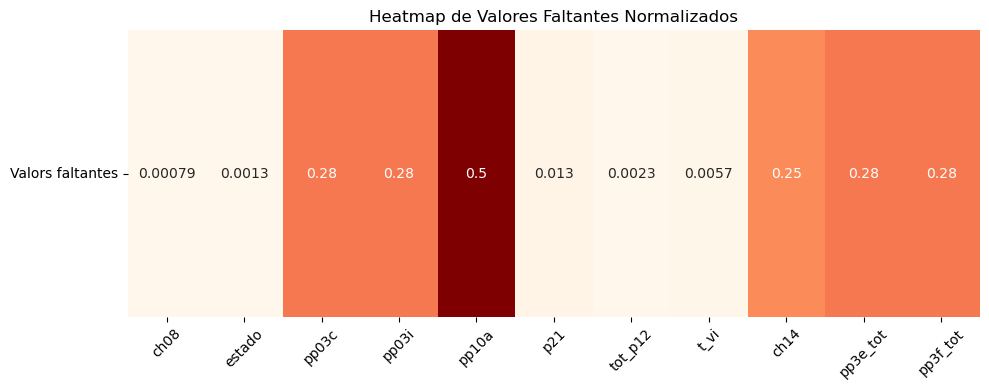

In [90]:
# Generamos el recuento de valores vacios
missing_counts = eph_105_125.isna().sum()
missing_counts = missing_counts[missing_counts > 0]

# Normalizar los valores faltantes para mejorar la visibilidad
normalized_missing = missing_counts / eph_105_125.shape[0]  # Normalizamos por el total de filas
missing_df = pd.DataFrame(normalized_missing, columns=['Valors faltantes'])

# Crear el heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(missing_df.transpose(), annot=True, cmap='OrRd', cbar=False)
plt.title('Heatmap de Valores Faltantes Normalizados')
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### PARTE 1 - 2.d: Unión de base Hogares e Individuos 

In [91]:
# Seleccion de variables de interes
sel_HOG_T105 = ["CODUSU", "nro_hogar", "iv1", "iv2", "iv6", "iv8", "ii8"]
sel_HOG_T125 = ["CODUSU", "NRO_HOGAR", "IV1", "IV2", "IV6", "IV8", "II8"]

# Actualizamos nuestro dataframe con las variables seleccionadas y la región seleccionada Noroeste = NOA = 40
HOG_T105 = H105_original[H105_original['region'] == 40][sel_HOG_T105]
HOG_T125 = H125_original[H125_original['REGION'] == 40][sel_HOG_T125]

# Homogeneizamos los nombres de las columnas para poder fusionarlas más adelante
column_mapping_hog = dict(zip(sel_HOG_T125, sel_HOG_T105)) # diccionario
HOG_T125 = HOG_T125.rename(columns=column_mapping_hog) # renombramos

# Fusionamos los archivos
HOG_105_125 = pd.concat([HOG_T105, HOG_T125], ignore_index=True)
HOG_105_125.sample(6)

,CODUSU,nro_hogar,iv1,iv2,iv6,iv8,ii8
2925,TQRMNOQVRHKOLRCDEHPJB00860310,1.0,1.0,4.0,1.0,1.0,2.0
4699,TQRMNOQYQHLNKOCDEGOIH00861160,1.0,1.0,3.0,1.0,1.0,2.0
446,161927,1.0,1.0,4.0,1.0,1.0,2.0
560,216848,1.0,1.0,4.0,1.0,1.0,1.0
3738,TQRMNOSSVHLOLTCDEHPJB00854540,1.0,1.0,2.0,1.0,1.0,2.0
4856,TQRMNOTWTHKKKMCDEHLEH00879381,1.0,1.0,3.0,1.0,1.0,4.0


In [92]:
# INNER JOIN
inner = eph_105_125.merge(HOG_105_125, on=['CODUSU', 'nro_hogar'], how='inner')
print(f"Inner Join estructura: {inner.shape}, número de NAN: {inner.isna().sum().sum()}")

# LEFT JOIN
left = eph_105_125.merge(HOG_105_125, on=['CODUSU', 'nro_hogar'], how='left')
print(f"Left Join estructura: {left.shape}, número de NAN: {left.isna().sum().sum()}")

# RIGHT JOIN
right = eph_105_125.merge(HOG_105_125, on=['CODUSU', 'nro_hogar'], how='right')
print(f"Right Join estructura: {right.shape}, número de NAN: {right.isna().sum().sum()}")

# OUTER JOIN
outer = eph_105_125.merge(HOG_105_125, on=['CODUSU', 'nro_hogar'], how='outer')
print(f"Outer Join estructura: {outer.shape}, número de NAN: {outer.isna().sum().sum()}")

Inner Join estructura: (19090, 30), número de NAN: 36348
Left Join estructura: (19090, 30), número de NAN: 36348
Right Join estructura: (19090, 30), número de NAN: 36348
Outer Join estructura: (19090, 30), número de NAN: 36348


Son todos iguales básicamente por el hecho de que se deben corresponder uno a uno. Es decir, para cada persona hay un hogar asociado y viceversa, por lo tanto cada intento de unión arroja el mismo resultado.

#### PARTE 2 - 3: Gráfico de barras por sexo

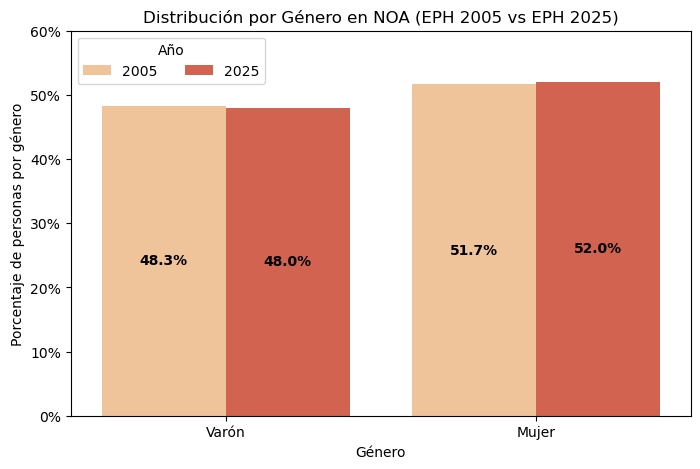

In [60]:
# Calculamos el porcentaje de varones y mujeres por año
porcentaje_genero = eph_105_125.groupby(['df', 'ch04']).size().reset_index(name='cantidad')
porcentaje_genero['porcentaje'] = porcentaje_genero.groupby('df')['cantidad'].transform(lambda x: x / x.sum())
porcentaje_genero["df"] = porcentaje_genero["df"].replace({"T105": "2005", "T125": "2025"})

# Visualizamos los resultados
plt.figure(figsize=(8, 5))
sns.barplot(data=porcentaje_genero, x='ch04', y='porcentaje', hue='df', palette='OrRd')
plt.xticks([0, 1], ['Varón', 'Mujer'])
plt.yticks(np.arange(0, 0.66, 0.1), labels=[f'{int(x*100)}%' for x in np.arange(0, 0.66, 0.1)])
plt.legend(title="Año", loc="upper left", ncol=2)
plt.xlabel('Género')
plt.ylabel('Porcentaje de personas por género')
plt.title('Distribución por Género en NOA (EPH 2005 vs EPH 2025)')

# Agregar etiquetas de porcentaje en cada barra
for i, bar in enumerate(plt.gca().patches):
    height = bar.get_height()
    if height == 0:
        pass
    else:
        # Agregar etiquetas de porcentaje en cada barra, centradas y en negrita, eliminando la última etiqueta extra
        plt.gca().text(
            bar.get_x() + bar.get_width() / 2,
            height / 2,
            f'{height:.1%}',
            ha='center',
            va='center',
            fontsize=10,
            fontweight='bold'
            )

plt.show()

#### PARTE 2 - 4: Matriz de correlaciones

In [61]:
# Seleccion de variables de interes
corr = pd.DataFrame()

#eph_105_125[['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']]

# Binarias:
corr["Varon"] = eph_105_125['ch04'].apply(lambda x: 1 if x == 1 else 0)
corr["Mujer"] = eph_105_125['ch04'].apply(lambda x: 1 if x == 2 else 0)

corr["ESTADO_Unido"] = eph_105_125['ch07'].apply(lambda x: 1 if x == 1 else 0) # Unido
corr["ESTADO_Casado"] = eph_105_125['ch07'].apply(lambda x: 1 if x == 2 else 0) # Casado
corr["ESTADO_Divorciado"] = eph_105_125['ch07'].apply(lambda x: 1 if x == 3 else 0) # Divorciado
corr["ESTADO_Viudo"] = eph_105_125['ch07'].apply(lambda x: 1 if x == 4 else 0) # Viudo
corr["ESTADO_Soltero"] = eph_105_125['ch07'].apply(lambda x: 1 if x == 5 else 0) # Soltero

# Agrupamos para la cobertura médica, para simplificar el análisis
corr["Obra social"] = eph_105_125['ch08'].apply(lambda x: 1 if x in [1, 12, 13, 123] else 0) # Obra social
corr["Prepaga"] = eph_105_125['ch08'].apply(lambda x: 1 if x in [2, 12, 23, 123] else 0) # Mutual/prepaga/servicio de emergencia
corr["Planes publicos"] = eph_105_125['ch08'].apply(lambda x: 1 if x in [3, 13, 23, 123] else 0) # Planes y seguros públicos
corr["No tiene"] = eph_105_125['ch08'].apply(lambda x: 1 if x == 4 else 0) # No paga ni le descuentan

corr["Primario Incompleto"] = eph_105_125['nivel_ed'].apply(lambda x: 1 if x in [1] else 0) # Primario incompleto y completo
corr["Primario Completo"] = eph_105_125['nivel_ed'].apply(lambda x: 1 if x in [2] else 0) # Primario completo
corr["Secundario Incompleto"] = eph_105_125['nivel_ed'].apply(lambda x: 1 if x in [3] else 0) # Secundario incompleto
corr["Secundario Completo"] = eph_105_125['nivel_ed'].apply(lambda x: 1 if x in [4] else 0) # Secundario completo
corr["Superior Incompleto"] = eph_105_125['nivel_ed'].apply(lambda x: 1 if x in [5] else 0) # Superior y universitario incompleto
corr["Superior Completo"] = eph_105_125['nivel_ed'].apply(lambda x: 1 if x in [6] else 0) # Superior y universitario completo
corr["Sin Instrucción"] = eph_105_125['nivel_ed'].apply(lambda x: 1 if x == 7 else 0) # Sin instrucción

corr["Ocupado"] = eph_105_125['estado'].apply(lambda x: 1 if x == 1 else 0) # Ocupado
corr["Desocupado"] = eph_105_125['estado'].apply(lambda x: 1 if x == 2 else 0) # Desocupado
corr["Inactivo"] = eph_105_125['estado'].apply(lambda x: 1 if x == 3 else 0) # Inactivo
corr["Menor_de_10"] = eph_105_125['estado'].apply(lambda x: 1 if x == 4 else 0) # Menor de 10 años

corr["Jubilado"] = eph_105_125['cat_inac'].apply(lambda x: 1 if x == 1 else 0) # Jubilado/pensionado
corr["Rentista"] = eph_105_125['cat_inac'].apply(lambda x: 1 if x == 2 else 0) # Rentista
corr["Estudiante"] = eph_105_125['cat_inac'].apply(lambda x: 1 if x == 3 else 0) # Estudiante
corr["Ama_de_casa"] = eph_105_125['cat_inac'].apply(lambda x: 1 if x == 4 else 0) # Ama de casa
corr["Menor_de_6"] = eph_105_125['cat_inac'].apply(lambda x: 1 if x == 5 else 0) # Menor de 6 años
corr["Discapacitado"] = eph_105_125['cat_inac'].apply(lambda x: 1 if x == 6 else 0) # Discapacitado
corr["Otros"] = eph_105_125['cat_inac'].apply(lambda x: 1 if x in [7, 0] else 0) # Otros

corr["Ingreso_per_capita"] = eph_105_125['ipcf'] # Ingreso per cápita
corr["df"] = eph_105_125['df'].replace({"T105": 2005, "T125": 2025}) # Año

C:\Users\marti\AppData\Local\Temp\ipykernel_16900\2096307306.py:44: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  corr["df"] = eph_105_125['df'].replace({"T105": 2005, "T125": 2025}) # Año


<Axes: >

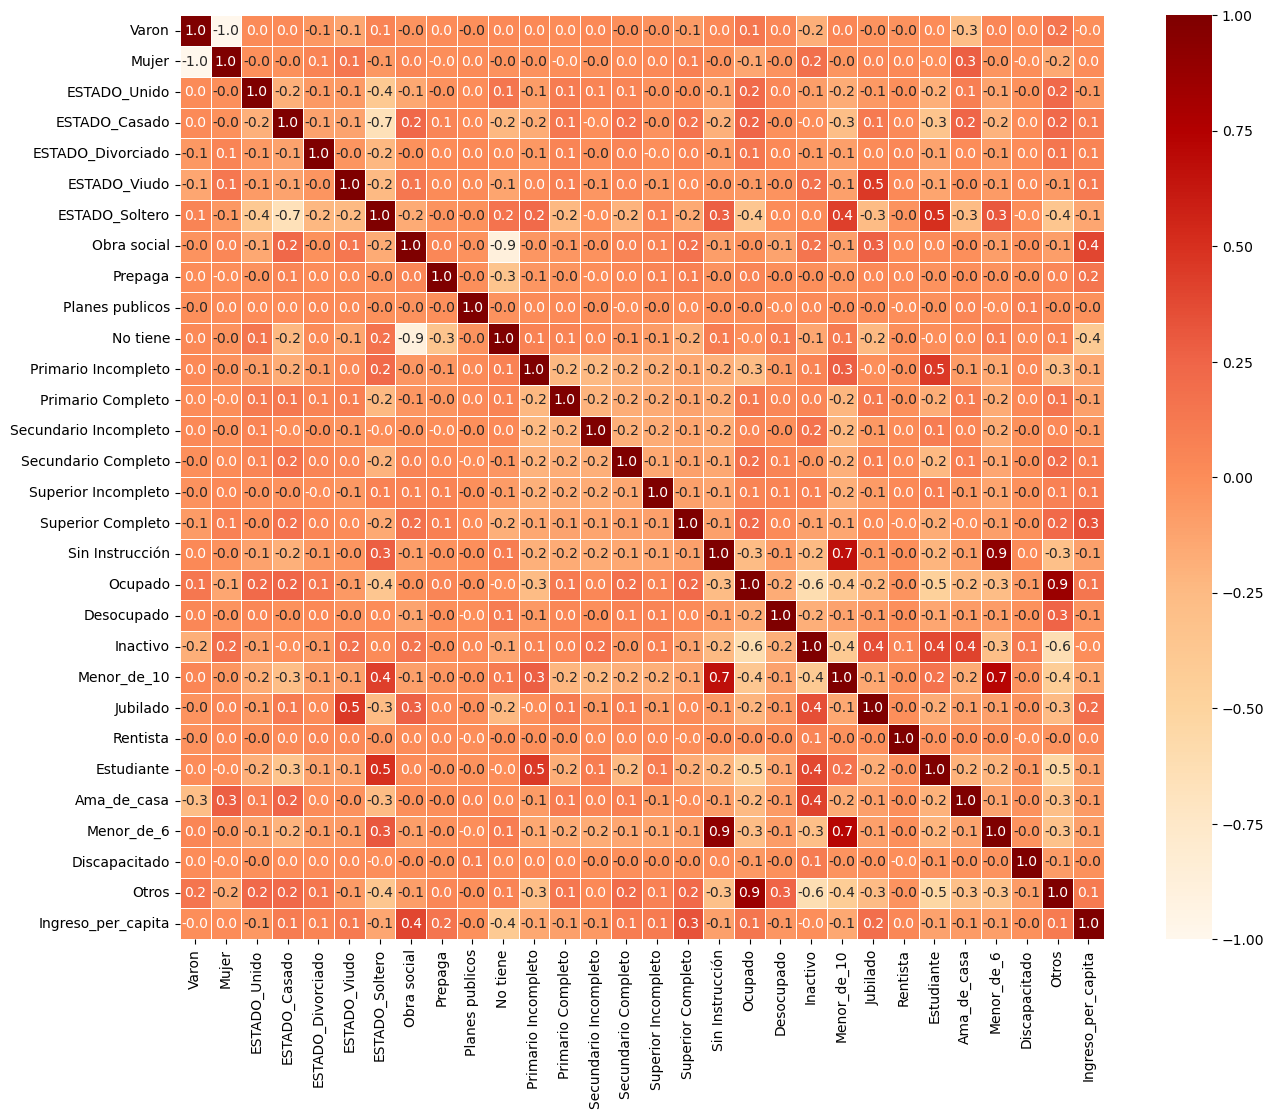

In [26]:
# Correlograma 2005
corr_2005 = corr[corr['df'] == 2005]
corr_2005 = corr_2005.drop(columns=['df'])  # Eliminamos la columna 'df' para el cálculo de correlación
plt.figure(figsize=(16, 12))
sns.heatmap(corr_2005.corr(), annot=True, fmt=".1f", cmap='OrRd', cbar=True, square=True, linewidths=.5)

<Axes: >

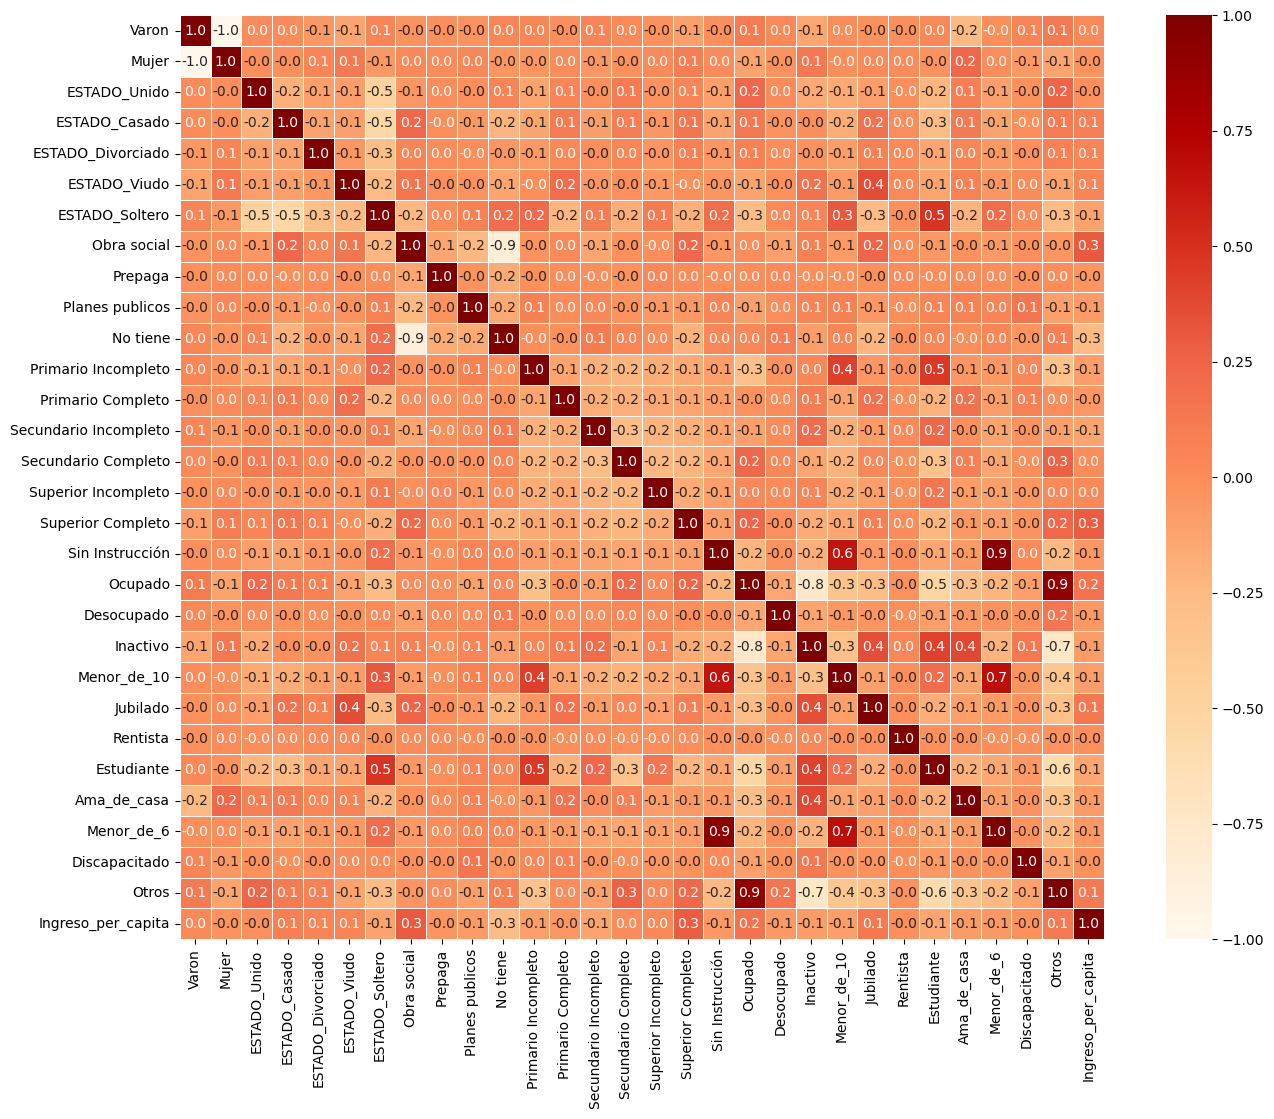

In [62]:
# Correlograma 2025
corr_2025 = corr[corr['df'] == 2025]
corr_2025 = corr_2025.drop(columns=['df'])  # Eliminamos la columna 'df' para el cálculo de correlación
plt.figure(figsize=(16, 12))
sns.heatmap(corr_2025.corr(), annot=True, fmt=".1f", cmap='OrRd', cbar=True, square=True, linewidths=.5)

#### Parte 3 - 5 y 6: No respuesta en ITF y adulto equivalente

Primero crearemos la columna de adulto equivalente y luego realizaremos la partición en base a respuesta de ITF

In [63]:
# Cargamos la tabla adulto
# adulto_esquiv = pd.read_excel("C:\\Users\\user\\Documents\\GitHub\\Big-Data-UBA--Grupo-2\\base de datos\\tabla_adulto_equiv.xlsx")
adulto_esquiv = pd.read_excel("C:\\Users\\marti\\OneDrive\\Documentos\\GitHub\\Big-Data-UBA--Grupo-2\\base de datos\\tabla_adulto_equiv.xlsx")

adulto_esquiv.sample(5)


,Edad,Mujeres,Varones
10,10 años,0.70,0.79
15,15 años,0.77,1.00
14,14 años,0.76,0.96
9,9 años,0.69,0.69
3,3 años,0.51,0.51


In [64]:
# Creamos una función para categorizar las edades
def map_age_to_range(age):
    if age < 1:
        return 'Menor de 1 año'
    elif age == 1:
        return '1 año'
    elif age == 2:
        return '2 años'
    elif age == 3:
        return '3 años'
    elif age == 4:
        return '4 años'
    elif age == 5:
        return '5 años'
    elif age == 6:
        return '6 años'
    elif age == 7:
        return '7 años'
    elif age == 8:
        return '8 años'
    elif age == 9:
        return '9 años'
    elif age == 10:
        return '10 años'
    elif age == 11:
        return '11 años'
    elif age == 12:
        return '12 años'
    elif age == 13:
        return '13 años'
    elif age == 14:
        return '14 años'
    elif age == 15:
        return '15 años'
    elif age == 16:
        return '16 años'
    elif age == 17:
        return '17 años'
    elif 18 <= age <= 29:
        return '18 a 29 años'
    elif 30 <= age <= 45:
        return '30 a 45 años'
    elif 46 <= age <= 60:
        return '46 a 60 años'
    elif 61 <= age <= 75:
        return '61 a 75 años'
    else:
        return 'más de 75 años'

# Agregamos la colummna rango de edad en la base eph
eph_105_125['rango_edad'] = eph_105_125['ch06'].apply(map_age_to_range)

# Renombramos para hacer el merge
adulto_esquiv_renamed = adulto_esquiv.rename(columns={'Edad': 'rango_edad'})

# Unimos las bases
eph_merged = eph_105_125.merge(adulto_esquiv_renamed, on='rango_edad', how='left')

# Creamos columna adulto_esquiv en base a sexo
eph_merged['adulto_esquiv'] = eph_merged.apply(
    lambda row: row['Varones'] if row['ch04'] == 1 else row['Mujeres'] if row['ch04'] == 2 else None,
    axis=1
)

# Eliminamos las variables Mujeres y Varones
eph_merged = eph_merged.drop(columns=['Mujeres', 'Varones'])

# Creamos el concatenado para generar un codigo de hogar
eph_merged['ID_hogar'] = eph_merged['CODUSU'].astype(str) + '-' + eph_merged['nro_hogar'].astype(str)

#Creamos la variable ad_equiv_hogar
eph_merged['ad_equiv_hogar'] = eph_merged.groupby('ID_hogar')['adulto_esquiv'].transform('sum')

# Una vez que hemos creado las variables, creamos las bases del punto 5
respondieron = eph_merged[eph_merged['itf'] > 0]
norespondieron = eph_merged[eph_merged['itf'] == 0]

#### Parte 3 - 7: Ingreso necesario

In [65]:
# Definir los valores de la Canasta Básica Total por adulto equivalente
cbt_valores = {
    'T105': 205.07,   # Primer trimestre de 2005
    'T125': 365177   # Primer trimestre de 2025
}

# Crear la columna 'ingreso_necesario' multiplicando por el valor correspondiente
respondieron.loc[:,'ingreso_necesario'] = respondieron.apply(
    lambda row: row['ad_equiv_hogar'] * cbt_valores.get(row['df'], 0),
    axis=1
)
respondieron.sample(5)

C:\Users\marti\AppData\Local\Temp\ipykernel_16900\875125945.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron.loc[:,'ingreso_necesario'] = respondieron.apply(


,CODUSU,nro_hogar,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf,...,ch13,ch14,pp3e_tot,pp3f_tot,df,rango_edad,adulto_esquiv,ID_hogar,ad_equiv_hogar,ingreso_necesario
15743,TQRMNOPXXHJMKUCDEHJGH00876931,1.0,1,39,5,4.0,4,1.0,0,3.120000e+05,...,1.0,NaN,36.0,0.0,T125,30 a 45 años,1.00,TQRMNOPXXHJMKUCDEHJGH00876931-1.0,7.17,2.618319e+06
2060,183961,1.0,2,9,5,1.0,1,4.0,3,1.775000e+02,...,2.0,04,0.0,0.0,T105,9 años,0.69,183961 -1.0,4.73,9.699811e+02
1616,134646,1.0,2,30,5,1.0,6,1.0,0,8.333333e+02,...,1.0,,45.0,0.0,T105,30 a 45 años,0.77,134646 -1.0,1.63,3.342641e+02
11851,TQRMNOQTUHMNLSCDEHJGH00878831,1.0,2,0,5,3.0,7,4.0,5,8.750000e+04,...,0.0,NaN,NaN,NaN,T125,Menor de 1 año,0.35,TQRMNOQTUHMNLSCDEHJGH00878831-1.0,2.81,1.026147e+06
17031,TQRMNOPPXHLOKSCDEGOIH00853414,1.0,1,66,2,1.0,1,3.0,1,1.080000e+06,...,2.0,4.0,NaN,NaN,T125,61 a 75 años,0.83,TQRMNOPPXHLOKSCDEGOIH00853414-1.0,1.50,5.477655e+05


#### Parte 3 - 8: Columna pobre

In [66]:
# Creamos la variable "pobre"
# Donde 1 es igual a pobre y 0 no pobre
respondieron.loc[:,'pobre'] = (respondieron['itf'] < respondieron['ingreso_necesario']).astype(int)

# Creamos la tabla
tabla_pobreza = (
    respondieron
    .groupby('df', as_index=False)
    .agg(
        pobres=('pobre', lambda x: (x == 1).sum()),
        total=('pobre', 'count')
    )
)
tabla_pobreza['porcentaje'] = (tabla_pobreza['pobres'] / tabla_pobreza['total'] * 100).round(2)
tabla_pobreza

C:\Users\marti\AppData\Local\Temp\ipykernel_16900\3795539360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron.loc[:,'pobre'] = (respondieron['itf'] < respondieron['ingreso_necesario']).astype(int)


,df,pobres,total,porcentaje
0,T105,4072,9278,43.89
1,T125,3888,8695,44.72


#### Parte 3 - 9: Analisis exploratorio de pobre

In [67]:
# Estadísticas descriptivas relevantes de "pobre" por año
desc_pobre = (
    respondieron
    .groupby('df')
    .agg(
        media_pobre=('pobre', 'mean'),
        mediana_pobre=('pobre', 'median'),
        std_pobre=('pobre', 'std'),
        cantidad=('pobre', 'count'),

    )
    .reset_index()
)
desc_pobre['media_pobre'] = (desc_pobre['media_pobre'] * 100).round(2)
desc_pobre

,df,media_pobre,mediana_pobre,std_pobre,cantidad
0,T105,43.89,0.0,0.496278,9278
1,T125,44.72,0.0,0.497228,8695


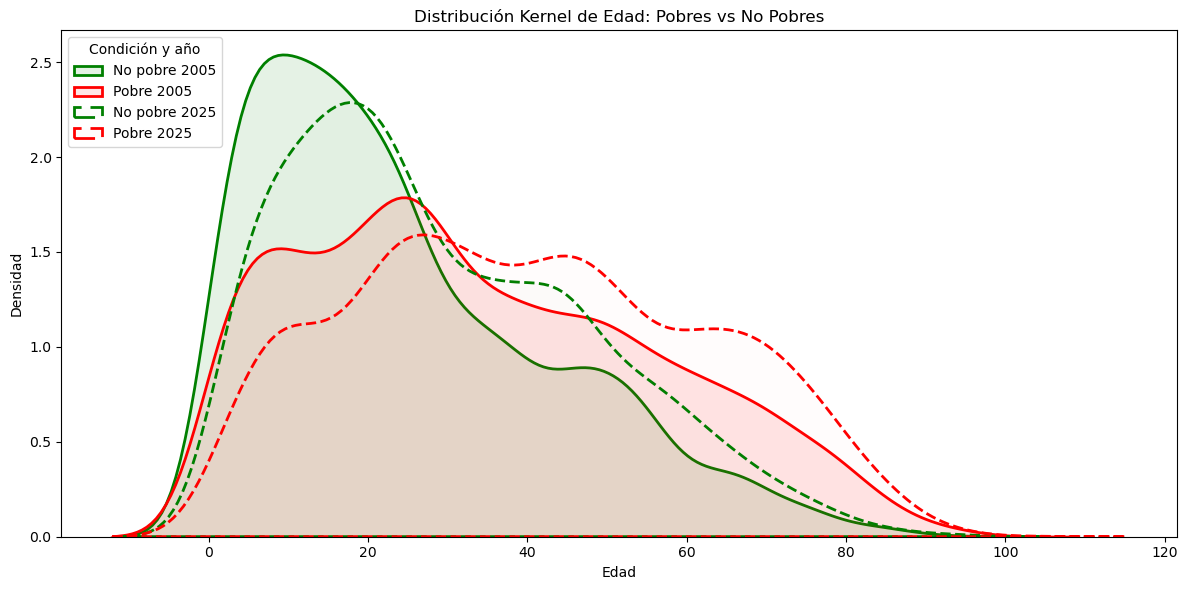

In [68]:
# Gráfico: Distribución kernel de la edad para pobres y no pobres superpuestos
fig, ax = plt.subplots(figsize=(12, 6))
# Distribución kernel de la edad para pobres y no pobres, separados por año
sns.kdeplot(
    data=respondieron[respondieron['df'] == 'T105'],
    x='ch06',
    hue='pobre',
    multiple='layer',
    common_norm=False,
    palette= ['red', 'green'],
    fill=True,
    alpha=0.1,
    linewidth=2,
    label='2005',
    ax=ax
)
sns.kdeplot(
    data=respondieron[respondieron['df'] == 'T125'],
    x='ch06',
    hue='pobre',
    multiple='layer',
    common_norm=False,
    palette=['red', 'green'],
    fill=True,
    alpha=0.01,
    linewidth=2,
    label='2025',
    linestyle='--',
    ax=ax
)

# Actualizamos la leyenda manualmente para mostrar todas las combinaciones
handles, labels = plt.gca().get_legend_handles_labels()
custom_labels = ['No pobre 2005', 'Pobre 2005', 'No pobre 2025', 'Pobre 2025']
plt.legend(handles, custom_labels, title='Condición y año', loc='upper right')
plt.gca().legend(handles=plt.gca().get_legend_handles_labels()[0], labels=custom_labels, title='Condición y año', loc='upper left')

plt.yticks(np.arange(0, 0.026, 0.005), labels=[f'{x*100:.1f}' for x in np.arange(0, 0.026, 0.005)])
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.title('Distribución Kernel de Edad: Pobres vs No Pobres')
plt.tight_layout()
plt.show()

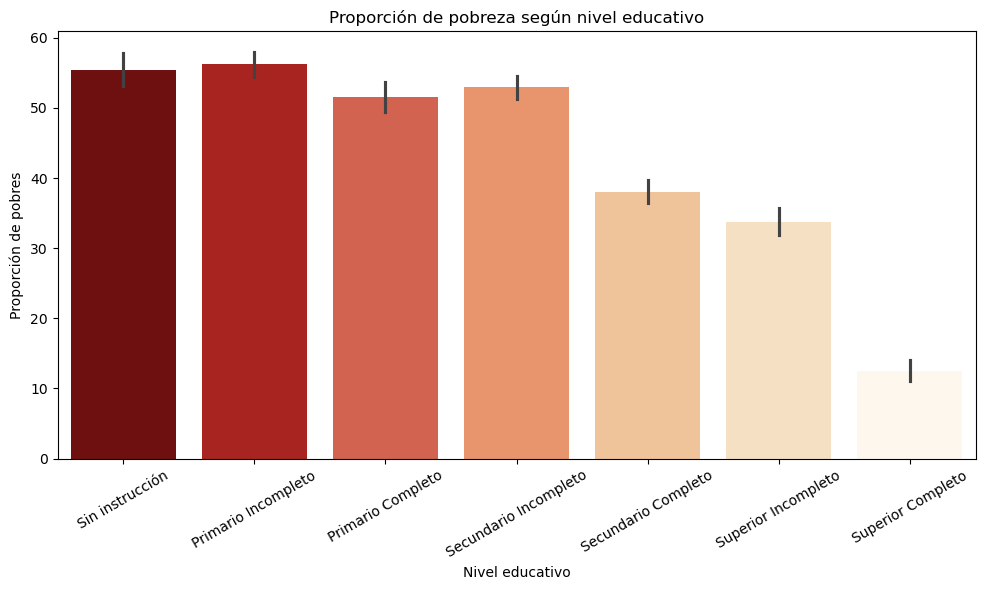

In [69]:
barras = respondieron.copy()
barras.loc[:,"nivel_ed"] = barras["nivel_ed"].replace(7,0)


# Gráfico de barras: proporción de pobres por nivel educativo
plt.figure(figsize=(10, 6))


sns.barplot(
    data=barras,
    x='nivel_ed',
    hue = 'nivel_ed',
    legend = False,
    y='pobre',
    estimator=np.mean,
    palette='OrRd_r'
)

plt.xlabel('Nivel educativo')
plt.ylabel('Proporción de pobres')
plt.title('Proporción de pobreza según nivel educativo')
plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5, 6],
    labels=[
        'Sin instrucción', 'Primario Incompleto', 'Primario Completo',
        'Secundario Incompleto', 'Secundario Completo',
        'Superior Incompleto', 'Superior Completo'
    ],
    rotation=30
)
plt.yticks(np.arange(0, 0.61, 0.1), labels=[f'{x*100:.0f}' for x in np.arange(0, 0.61, 0.1)])


plt.tight_layout()
plt.show()

In [70]:
# Creamos la variable edad al cuadrado
eph_105_125['edad2'] = eph_105_125['ch06'] ** 2   # CH06 = edad según diccionario EPH




Text(0, 0.5, 'Frecuencia')

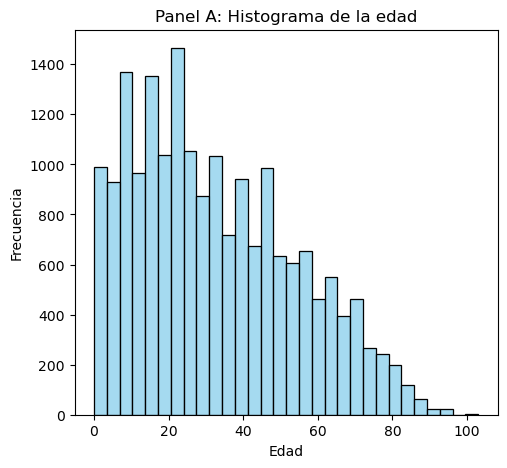

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

# Panel A: Histograma de la edad
plt.subplot(1,2,1)
sns.histplot(eph_105_125['ch06'], bins=30, kde=False, color='skyblue')
plt.title("Panel A: Histograma de la edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")


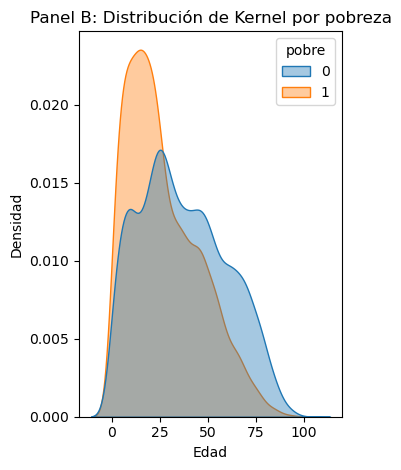

In [72]:
# Panel B: Kernel density para pobres y no pobres
plt.subplot(1,2,2)
sns.kdeplot(data=respondieron, x='ch06', hue='pobre', fill=True, common_norm=False, alpha=0.4)
plt.title("Panel B: Distribución de Kernel por pobreza")
plt.xlabel("Edad")
plt.ylabel("Densidad")

plt.tight_layout()
plt.show()


In [73]:
CONSIGNA 2

SyntaxError: invalid syntax (1102104771.py, line 1)

In [74]:
eph_105_125['ch14'] = pd.to_numeric(eph_105_125['ch14'], errors='coerce')


In [75]:
# Diccionario tentativo de equivalencias según niveles EPH
mapa_niveles = {
    "Sin instrucción": 0,
    "Primario": 6,
    "EGB": 9, 
    "Secundario": 12,
    "Polimodal": 12,
    "Terciario": 14,
    "Universitario": 17,
    "Posgrado": 20
}


In [76]:
def calcular_educ(row):
    nivel = row['ch12']
    completo = row['ch13']
    ultimo_anio = row['ch14']
    
    if pd.isna(nivel):
        return None
    
    # Si terminó el nivel → asignar años completos
    if completo == 1:   # normalmente 1 = Sí, 2 = No en EPH
        return mapa_niveles.get(nivel, None)
    
    # Si no terminó → sumar los años que aprobó
    else:
        base = 0
        if nivel in mapa_niveles:
            base = 0 if nivel in ["Primario", "EGB"] else mapa_niveles[nivel] - 6
        return base + (ultimo_anio if pd.notna(ultimo_anio) else 0)

# Crear variable educ
eph_105_125['educ'] = eph_105_125.apply(calcular_educ, axis=1)



In [77]:
desc_educ = eph_105_125['educ'].describe(percentiles=[0.5])
print(desc_educ)


count    11262.000000
mean         3.256526
std          9.858595
min          0.000000
50%          2.000000
max         99.000000
Name: educ, dtype: float64


CONSIGNA 3

In [78]:
# Factor de conversión 2005 → 2025
factor_conversion = 365177 / 205.07

# Creamos variable ingreso_total_familiar homogeneizada
eph_105_125['ingreso_total_familiar'] = eph_105_125.apply(
    lambda row: row['itf'] * factor_conversion if row['df'] == 'T105' else row['itf'],
    axis=1
)


In [79]:
# Línea de pobreza (2025, pesos corrientes)
linea_pobreza = 365177


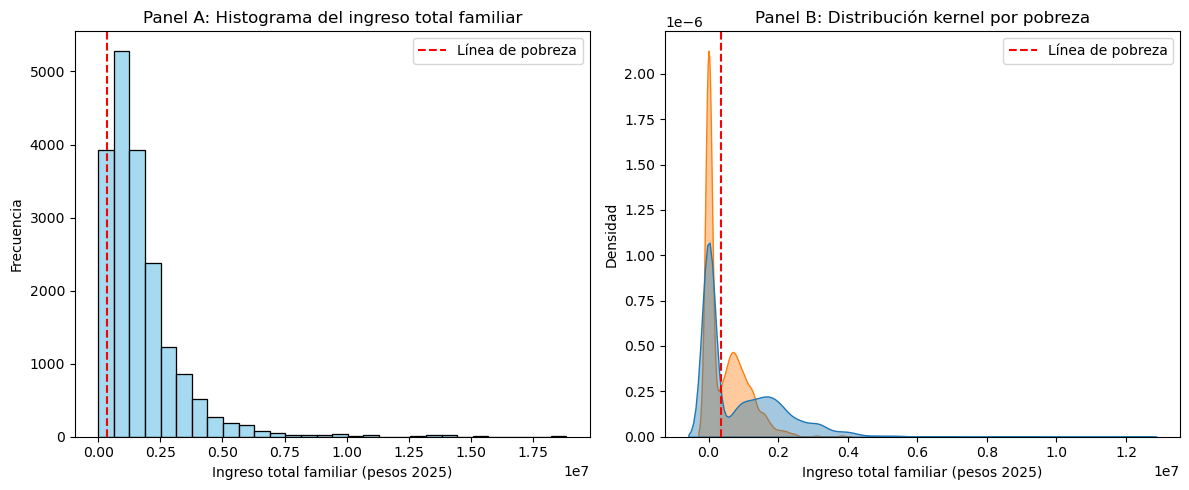

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

# Panel A: Histograma ingreso_total_familiar
plt.subplot(1,2,1)
sns.histplot(eph_105_125['ingreso_total_familiar'], bins=30, kde=False, color='skyblue')
plt.axvline(linea_pobreza, color='red', linestyle='--', label='Línea de pobreza')
plt.title("Panel A: Histograma del ingreso total familiar")
plt.xlabel("Ingreso total familiar (pesos 2025)")
plt.ylabel("Frecuencia")
plt.legend()

# Panel B: Distribución kernel pobres vs no pobres
plt.subplot(1,2,2)
sns.kdeplot(data=respondieron, x='itf', hue='pobre', fill=True, common_norm=False, alpha=0.4)
plt.axvline(linea_pobreza, color='red', linestyle='--', label='Línea de pobreza')
plt.title("Panel B: Distribución kernel por pobreza")
plt.xlabel("Ingreso total familiar (pesos 2025)")
plt.ylabel("Densidad")
plt.legend()

plt.tight_layout()
plt.show()


CONSIGNA 4

In [93]:
# Creamos variable horastrab solo para jefes de hogar
eph_105_125['horastrab'] = eph_105_125[['pp3e_tot', 'pp3f_tot']].sum(axis=1)

# Filtramos jefes de hogar
jefes = eph_105_125[eph_105_125['ch03'] == 1]


In [94]:
# Descriptivas de horastrab
desc_horas = jefes['horastrab'].describe(percentiles=[0.5])
print(desc_horas)

# También podés calcular desviación estándar explícitamente
print("Desvío estándar:", jefes['horastrab'].std())


count    5385.000000
mean       23.561560
std        24.765294
min         0.000000
50%        20.000000
max       126.000000
Name: horastrab, dtype: float64
Desvío estándar: 24.765294413212974
